In [ ]:
!pip install AdvancedAnalytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn

In [ ]:
from AdvancedAnalytics.ReplaceImputeEncode import DT, ReplaceImputeEncode
# Importing tools for handling data types (DT) and replacing, imputing, and encoding data.

from AdvancedAnalytics.Tree import tree_classifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from pydotplus import graph_from_dot_data
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tools.eval_measures as em
from AdvancedAnalytics.ReplaceImputeEncode import DT, ReplaceImputeEncode
from AdvancedAnalytics.Regression          import logreg, stepwise
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import label_binarize
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFE  # Import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, auc, precision_score, recall_score
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import ConfusionMatrixDisplay
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)

In [ ]:
from AdvancedAnalytics.ReplaceImputeEncode import DT, ReplaceImputeEncode
# Importing tools for handling data types (DT) and replacing, imputing, and encoding data.

from AdvancedAnalytics.Tree import tree_classifier
# Importing a custom decision tree classifier for display and visualization purposes.

from sklearn.model_selection import train_test_split, cross_validate
# Importing tools for splitting the data into training and validation sets (train_test_split)
# and for cross-validation to assess model performance (cross_validate).

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
# Importing DecisionTreeClassifier to build the decision tree model,
# plot_tree for visualizing the decision tree, and export_graphviz for converting the tree into graph data.

from pydotplus import graph_from_dot_data
# Importing pydotplus to handle graph data and create visual graphs from DOT files.

from matplotlib import pyplot as plt
# Importing matplotlib to plot and visualize the decision tree.

import pandas as pd
# Importing pandas to handle data operations such as reading a CSV file and data manipulation.
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
df = pd.read_csv('police_data (1).csv')

<ipython-input-3-541610bde38e>:2: DtypeWarning: Columns (3,53,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('police_data (1).csv')


In [ ]:
df.head()


,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,Reporting Area,Beat,Division,Sector,Council District,Target Area Action Grids,Community,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Special Report (Pre-RMS),Person Involvement Type,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Modus Operandi (MO),Family Offense,Hate Crime,Hate Crime Description,Weapon Used,Gang Related Offense,Drug Related Istevencident,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1
0,203058-2022,2022,203058-2022-01,1,PSE/09 - THEFT,THEFT OF PROP (AUTO ACC) <$100 - (NOT EMP),Apartment Parking Lot,Motor Vehicle,7152 FAIR OAKS AVE,NaN,4527.0,217.0,NORTHEAST,210.0,D13,Five Points,Vickery Meadows_PFA,00:00.0,2022,November,Tue,20:00,312,00:00.0,2022.0,November,Wed,7:00,313.0,03:00.0,52:49.0,2022,November,Wed,8:52,313,22-2198631,03:54.0,03:54.0,04:27.0,37:45.0,NaN,Victim,Individual,Hispanic or Latino,Hispanic or Latino,Female,94392,"WILLIS,LINDA,M",NaN,NaN,94392,T1245,54654,EX07,Investigations,Property Crime Division / NE Property Crimes,Suspended,Suspended,UNKN SUSP REMOVED THE REAR LICENSE PLATE OFF A...,False,NaN,NaN,NaN,NaN,No,MC-99999999-F133,99999999.0,PC 31.03(f),NaN,NaN,NaN,NaN,THEFT OF MOTOR VEHICLE PARTS OR ACCESSORIES,LARCENY/ THEFT OFFENSES,PROPERTY,23G,A,Coded,15:06.0,2503598.113,7005279.014,75231.0,DALLAS,TX,"7152 FAIR OAKS AVE\nDALLAS, TX 75231\n(32.8730..."
1,264509-2016,2016,264509-2016-01,2,58 - ROUTINE INVESTIGATION,FALSE STATEMENT FOR PROPERTY/CREDIT $2500 < $30K,Single Family Residence - Occupied,NaN,8545 MIDPARK RD,NaN,1022.0,644.0,NORTH CENTRAL,640.0,D11,Coit Springvalley,KitMaham_PFA,00:00.0,2016,September,Fri,12:00,260,00:00.0,2016.0,November,Mon,12:00,312.0,00:00.0,20:19.0,2016,November,Fri,12:20,309,16-2199695,19:48.0,19:48.0,20:25.0,19:48.0,NaN,Victim,Individual,Hispanic or Latino,Hispanic or Latino,Male,8101,"CERVANTEZ,DAVID,RUBEN",NaN,NaN,8101,8101,111210,G169,Investigations,Special Investigations / Financial Crimes,Suspended,Suspended,UNKNOWN SUSPECT STOLE COMPS VEHICLE BY USING F...,False,NaN,NaN,Other,No,UNK,FS-26070139-K156,26070139.0,PC 32.32,FRAUD,FRAUD,1100.0,PART2,NaN,NaN,NaN,NaN,NaN,NaN,43:58.0,2503120.012,7028108.585,75240.0,DALLAS,TX,"8545 MIDPARK RD\nDALLAS, TX 75240\n(32.93652, ..."
2,004110-2015,2015,004110-2015-01,2,58 - ROUTINE INVESTIGATION,CREDIT CARD OR DEBIT CARD ABUSE,Business Office,NaN,1400 S LAMAR ST,NaN,2123.0,151.0,CENTRAL,150.0,D2,NaN,NaN,00:00.0,2014,December,Mon,12:00,363,00:00.0,2014.0,December,Tue,12:00,364.0,00:00.0,21:06.0,2015,January,Tue,9:21,6,15-0034199,20:18.0,20:18.0,21:14.0,20:18.0,NaN,Victim,Business,NaN,NaN,NaN,7110,"VILLARREAL,EDWARD",NaN,NaN,7110,7110,83070,D197,Investigations,Special Investigations / Financial Crimes,Suspended,Suspended,SUSPECT GAVE FALSE CREDIT CARD INFORMATION TO ...,False,NaN,NaN,None (Mutually Exclusive),No,No,FS-26050014-K74,26050014.0,PC 32.31,FRAUD,FRAUD,1100.0,PART2,NaN,NaN,NaN,NaN,NaN,NaN,29:24.0,2

In [ ]:
df.describe()

,Year of Incident,Reporting Area,Beat,Sector,Year1 of Occurrence,Day1 of the Year,Year2 of Occurrence,Day2 of the Year,Offense Entered Year,Offense Entered Date/Time,Criminal Justice Information Service Code,UCR Code,X Coordinate,Y Cordinate,Zip Code
count,400760.000000,400528.000000,400669.000000,400717.000000,400760.000000,400760.000000,400739.000000,400739.000000,400760.000000,400760.000000,4.005150e+05,75247.000000,3.999930e+05,3.999930e+05,399525.000000
mean,2020.614270,3156.005340,416.717378,412.626667,2020.540523,189.498493,2020.550423,189.501621,2020.562636,188.947969,4.484134e+07,1063.204553,2.493455e+06,6.980365e+06,75224.926052
std,17.411134,1822.572303,197.204140,197.279587,2.616283,103.917469,2.616974,103.968870,2.610556,104.135339,3.277233e+07,941.930824,2.126071e+04,3.130185e+04,152.337872
min,1011.000000,1001.000000,111.000000,0.000000,1982.000000,1.000000,1900.000000,1.000000,2014.000000,1.000000,7.391108e+06,110.000000,2.419584e+06,6.891214e+06,10452.000000
25%,2019.000000,1251.000000,237.000000,230.000000,2019.000000,100.000000,2019.000000,100.000000,2019.000000,99.000000,2.399019e+07,710.000000,2.476525e+06,6.958549e+06,75215.000000
50%,2022.000000,3059.000000,424.000000,420.000000,2022.000000,197.000000,2022.000000,198.000000,2022.000000,197.000000,2.411000e+07,710.000000,2.493313e+06,6.978826e+06,75224.000000
75%,2022.000000,4347.000000,551.000000,550.000000,2022.000000,277.000000,2022.000000,277.000000,2022.000000,277.000000,5.799002e+07,720.000000,2.505087e+06,7.003042e+06,75237.000000
max,9578.000000,9612.000000,757.000000,750.000000,2024.000000,366.000000,2024.000000,366.000000,2024.000000,366.000000,1.000000e+08,5700.000000,2.586049e+06,7.084251e+06,95207.000000


In [ ]:
print(df.isnull().sum())

Incident Number w/year        0
Year of Incident              0
Service Number ID             0
Watch                         0
Call (911) Problem        37902
                          ...  
Y Cordinate                 767
Zip Code                   1235
City                       1130
State                      7693
Location1                   703
Length: 86, dtype: int64


In [ ]:
# Impute the mean for all null values in the DataFrame
# Exclude columns with object (string) dtype to avoid the TypeError
for col in df.select_dtypes(exclude=['object']).columns: # Exclude 'object' type columns
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = df.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after_imputation)


<ipython-input-12-1e31302b42e4>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)



Missing values after imputation:
 Incident Number w/year        0
Year of Incident              0
Service Number ID             0
Watch                         0
Call (911) Problem        37902
                          ...  
Y Cordinate                   0
Zip Code                      0
City                       1130
State                      7693
Location1                   703
Length: 86, dtype: int64


In [ ]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400760 entries, 0 to 400759
Data columns (total 86 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Incident Number w/year                     400760 non-null  object 
 1   Year of Incident                           400760 non-null  int64  
 2   Service Number ID                          400760 non-null  object 
 3   Watch                                      400760 non-null  object 
 4   Call (911) Problem                         362858 non-null  object 
 5   Type of Incident                           400759 non-null  object 
 6   Type  Location                             400303 non-null  object 
 7   Type of Property                           79381 non-null   object 
 8   Incident Address                           400050 non-null  object 
 9   Apartment Number                           104949 non-null  object 
 10  Reportin

In [ ]:
df.isnull().sum()

,0
Incident Number w/year,0
Year of Incident,0
Service Number ID,0
Watch,0
Call (911) Problem,37902
...,...
Y Cordinate,0
Zip Code,0
City,1130
State,7693


In [ ]:
# Generate descriptive statistics for numerical features
print(df.describe())

       Year of Incident  Reporting Area           Beat         Sector  \
count     400760.000000   400760.000000  400760.000000  400760.000000   
mean        2020.614270     3156.005340     416.717378     412.626667   
std           17.411134     1822.044682     197.181749     197.269003   
min         1011.000000     1001.000000     111.000000       0.000000   
25%         2019.000000     1252.000000     237.000000     230.000000   
50%         2022.000000     3059.000000     424.000000     420.000000   
75%         2022.000000     4347.000000     551.000000     550.000000   
max         9578.000000     9612.000000     757.000000     750.000000   

       Year1 of Occurrence  Day1 of the Year  Year2 of Occurrence  \
count        400760.000000     400760.000000        400760.000000   
mean           2020.540523        189.498493          2020.550423   
std               2.616283        103.917469             2.616906   
min            1982.000000          1.000000          1900.000000 

In [ ]:
# Explore data types of each column
print(df.dtypes)


Incident Number w/year     object
Year of Incident            int64
Service Number ID          object
Watch                      object
Call (911) Problem         object
                           ...   
Y Cordinate               float64
Zip Code                  float64
City                       object
State                      object
Location1                  object
Length: 86, dtype: object


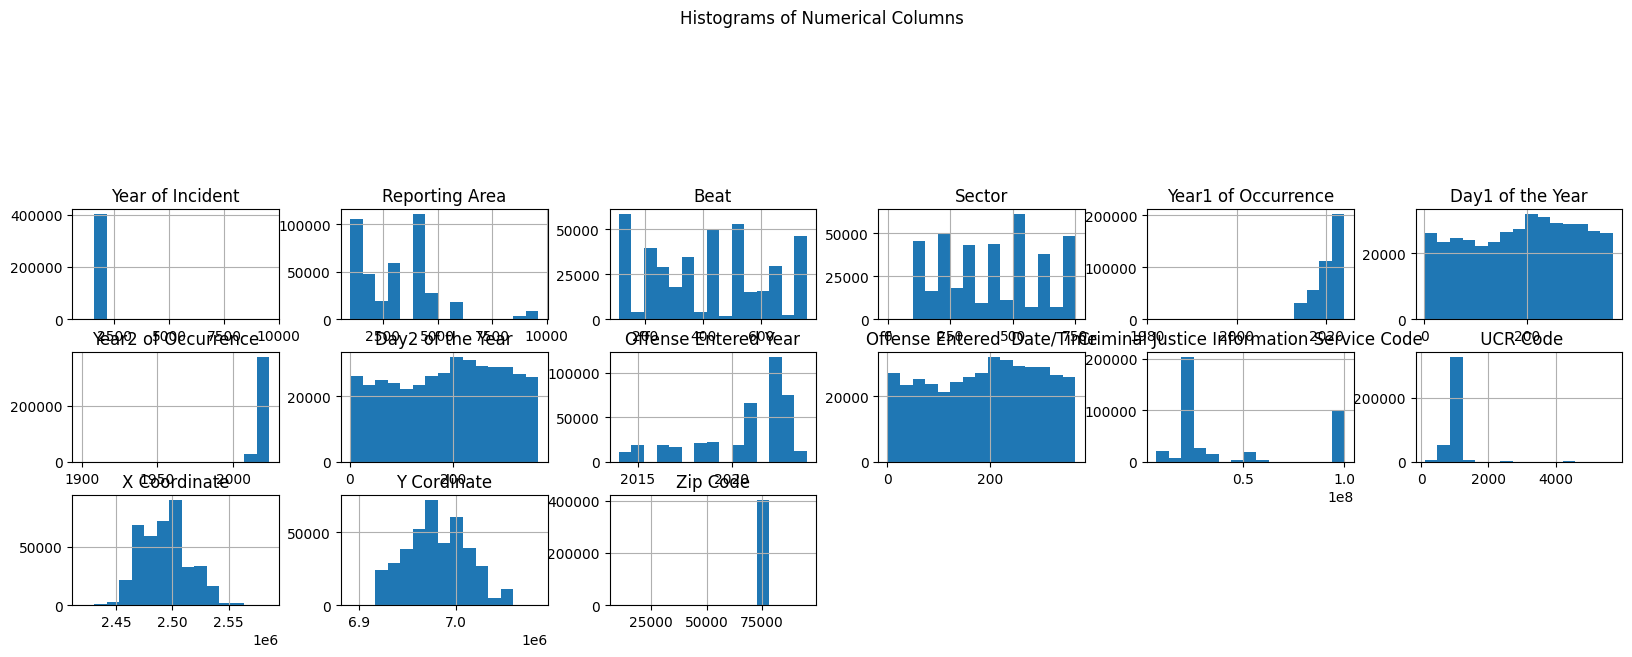

In [ ]:
# Histograms for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Adjust the layout to accommodate all 62 histograms
# You can increase the number of rows or columns to fit all plots.
# For example, you could change the layout to (11, 6) to have 11 rows and 6 columns,
# or to (10, 7) to have 10 rows and 7 columns.
df[numerical_cols].hist(bins=15, figsize=(20, 20), layout=(11, 6))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

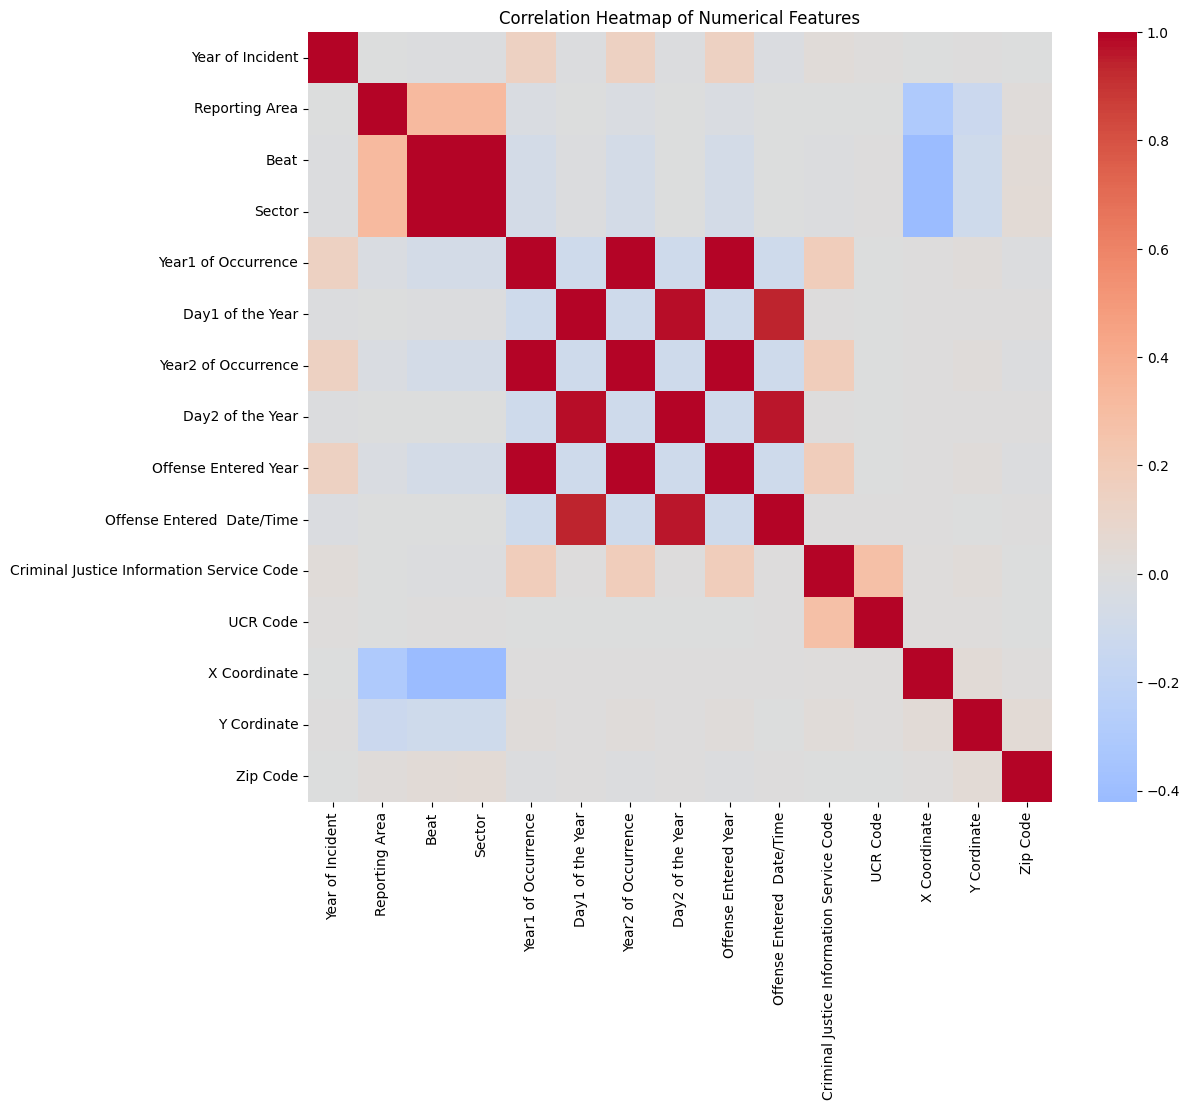

In [ ]:
# Correlation Analysis
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, fmt='.1f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [ ]:
# Frequency distribution for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nFrequency Distribution for {col}:")
    print(df[col].value_counts().head(10))



Frequency Distribution for Incident Number w/year:
Incident Number w/year
199587-2014    21
246967-2018    18
013407-2021    17
124487-2021    17
019483-2020    16
203530-2021    16
143240-2021    15
032695-2022    15
028699-2023    15
015274-2019    14
Name: count, dtype: int64

Frequency Distribution for Service Number ID:
Service Number ID
200912-2023-01    1
203058-2022-01    1
264509-2016-01    1
004110-2015-01    1
022647-2023-01    1
195028-2021-01    1
040548-2023-01    1
801523-2023-01    1
062598-2021-04    1
021055-2023-02    1
Name: count, dtype: int64

Frequency Distribution for Watch:
Watch
1    119800
3     97148
2     93700
1     31577
3     29659
2     28855
U        21
Name: count, dtype: int64

Frequency Distribution for Call (911) Problem:
Call (911) Problem
09V - UUMV                    73464
58 - ROUTINE INVESTIGATION    47046
6X - MAJOR DIST (VIOLENCE)    24553
PSE/11V - BURG MOTOR VEH      16081
40/01 - OTHER                 15194
11V - BURG MOTOR VEH          

<ipython-input-19-68705c1724ba>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date of Report'] = pd.to_datetime(df['Date of Report'], errors='coerce')
<ipython-input-19-68705c1724ba>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date incident created'] = pd.to_datetime(df['Date incident created'], errors='coerce')


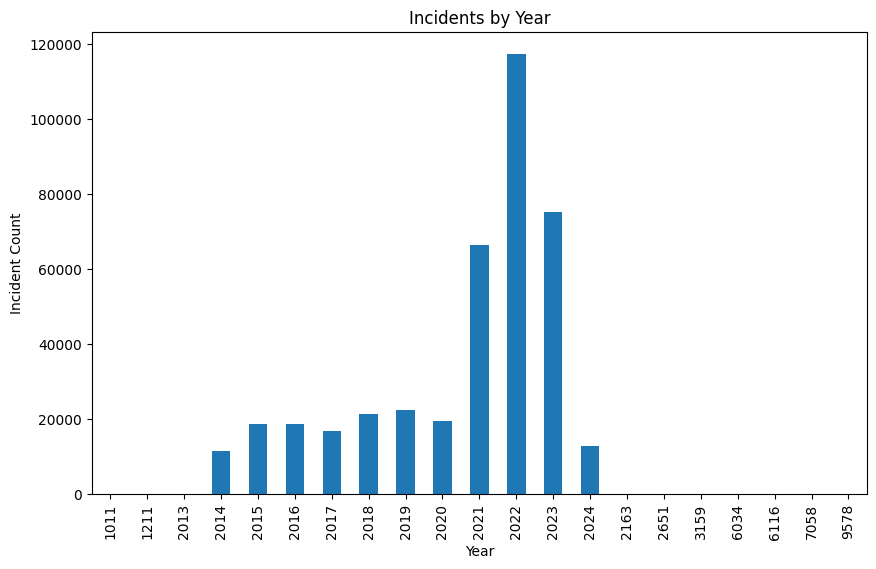

In [ ]:
# Convert date columns to datetime
df['Date of Report'] = pd.to_datetime(df['Date of Report'], errors='coerce')
df['Date1 of Occurrence'] = pd.to_datetime(df['Date1 of Occurrence'], errors='coerce')
df['Date incident created'] = pd.to_datetime(df['Date incident created'], errors='coerce')

# Plot incident counts by year
plt.figure(figsize=(10, 6))
df['Year of Incident'].value_counts().sort_index().plot(kind='bar')
plt.title("Incidents by Year")
plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.show()


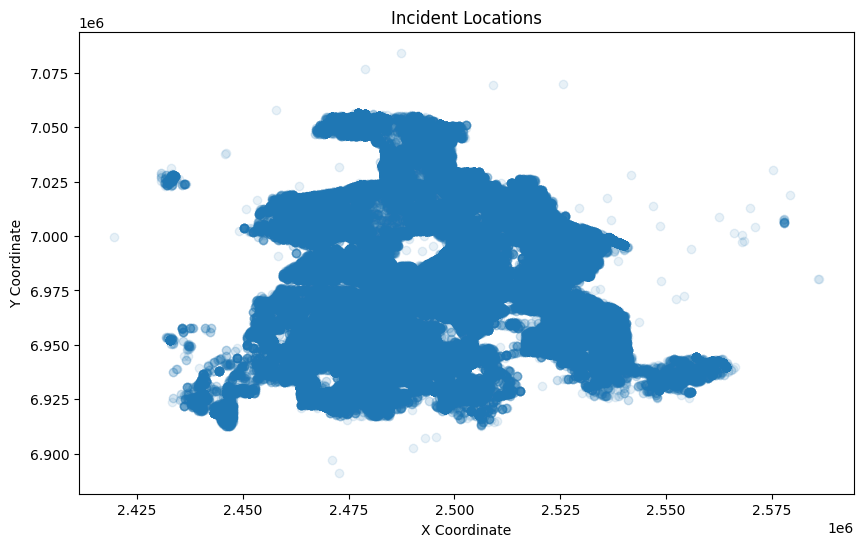

In [ ]:
# Plotting a scatter plot for coordinates if available
plt.figure(figsize=(10, 6))
plt.scatter(df['X Coordinate'], df['Y Cordinate'], alpha=0.1)
plt.title("Incident Locations")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()


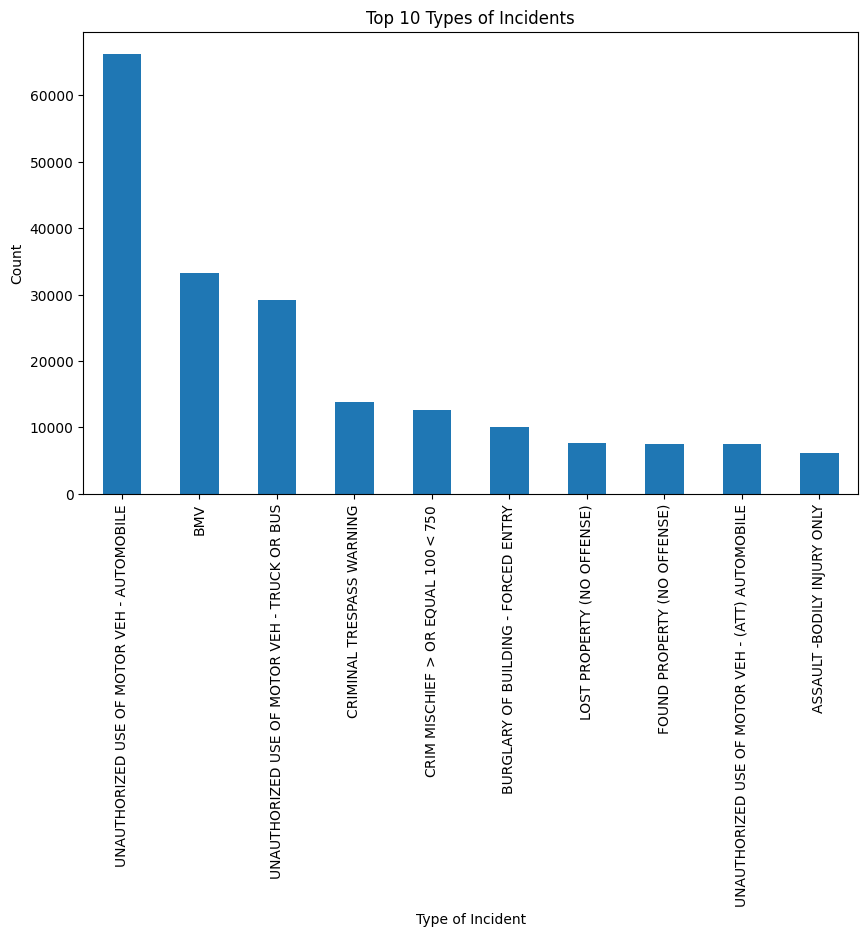

In [ ]:
# Bar plot for Type of Incident
plt.figure(figsize=(10, 6))
df['Type of Incident'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Types of Incidents")
plt.xlabel("Type of Incident")
plt.ylabel("Count")
plt.show()


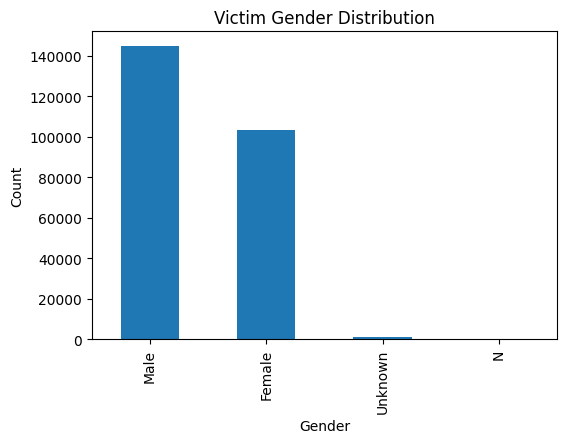

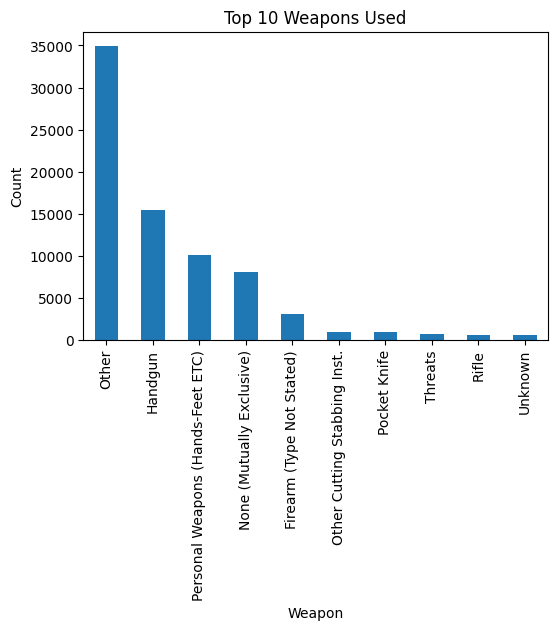

In [ ]:
# Plotting Victim Gender distribution
plt.figure(figsize=(6, 4))
df['Victim Gender'].value_counts().plot(kind='bar')
plt.title("Victim Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Plotting Weapon Used distribution
plt.figure(figsize=(6, 4))
df['Weapon Used'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Weapons Used")
plt.xlabel("Weapon")
plt.ylabel("Count")
plt.show()


In [ ]:
# Check for duplicate values in unique identifiers
print("Duplicate Incident Numbers:", df['Incident Number w/year'].duplicated().sum())
print("Duplicate Service Numbers:", df['Service Number ID'].duplicated().sum())

# Validate logical order of time-related columns
time_checks = (df['Call Received Date Time'] <= df['Call Cleared Date Time']).all()
print("All call received times are before call cleared times:", time_checks)


Duplicate Incident Numbers: 83028
Duplicate Service Numbers: 0
All call received times are before call cleared times: False


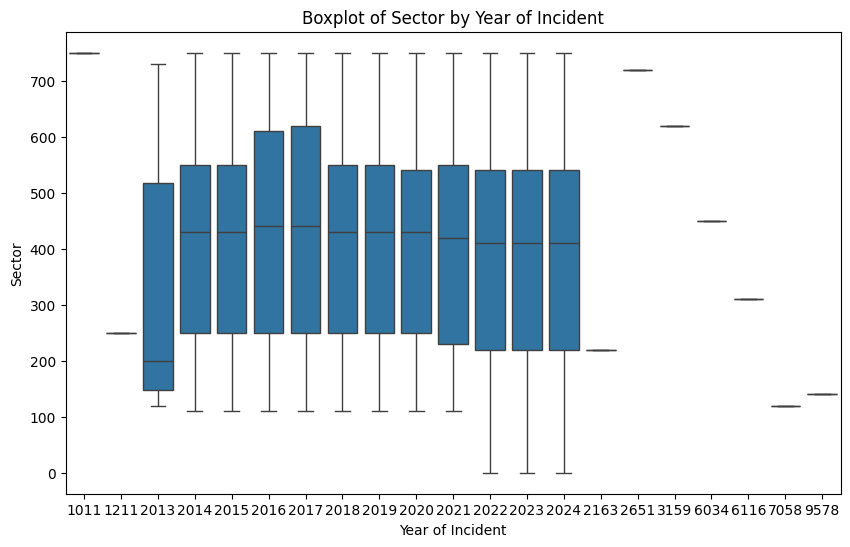

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for numeric columns, for example, 'Year of Incident' vs. 'Sector'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Year of Incident', y='Sector')
plt.title("Boxplot of Sector by Year of Incident")
plt.xlabel("Year of Incident")
plt.ylabel("Sector")
plt.show()


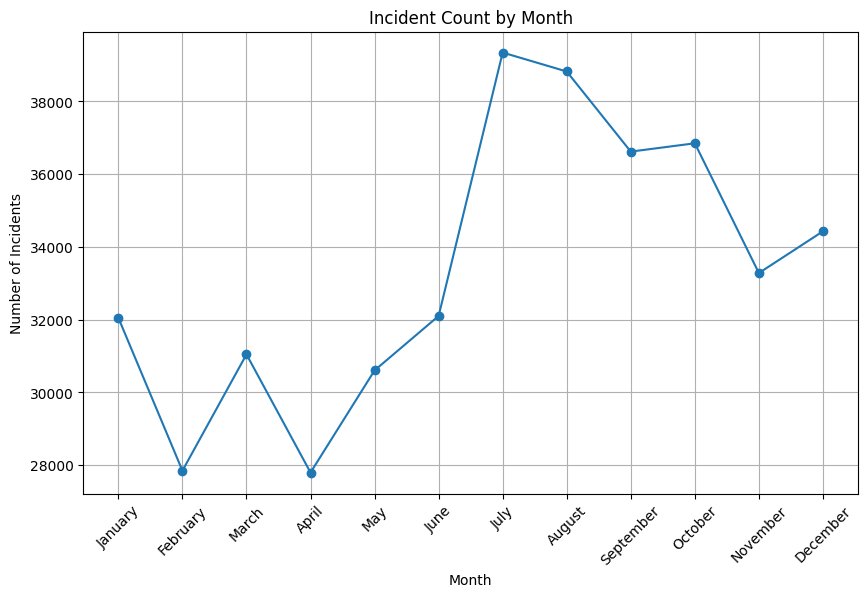

In [ ]:
#Line graph

incident_by_month = df['Month1 of Occurence'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(10, 6))
plt.plot(incident_by_month.index, incident_by_month.values, marker='o')
plt.title("Incident Count by Month")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


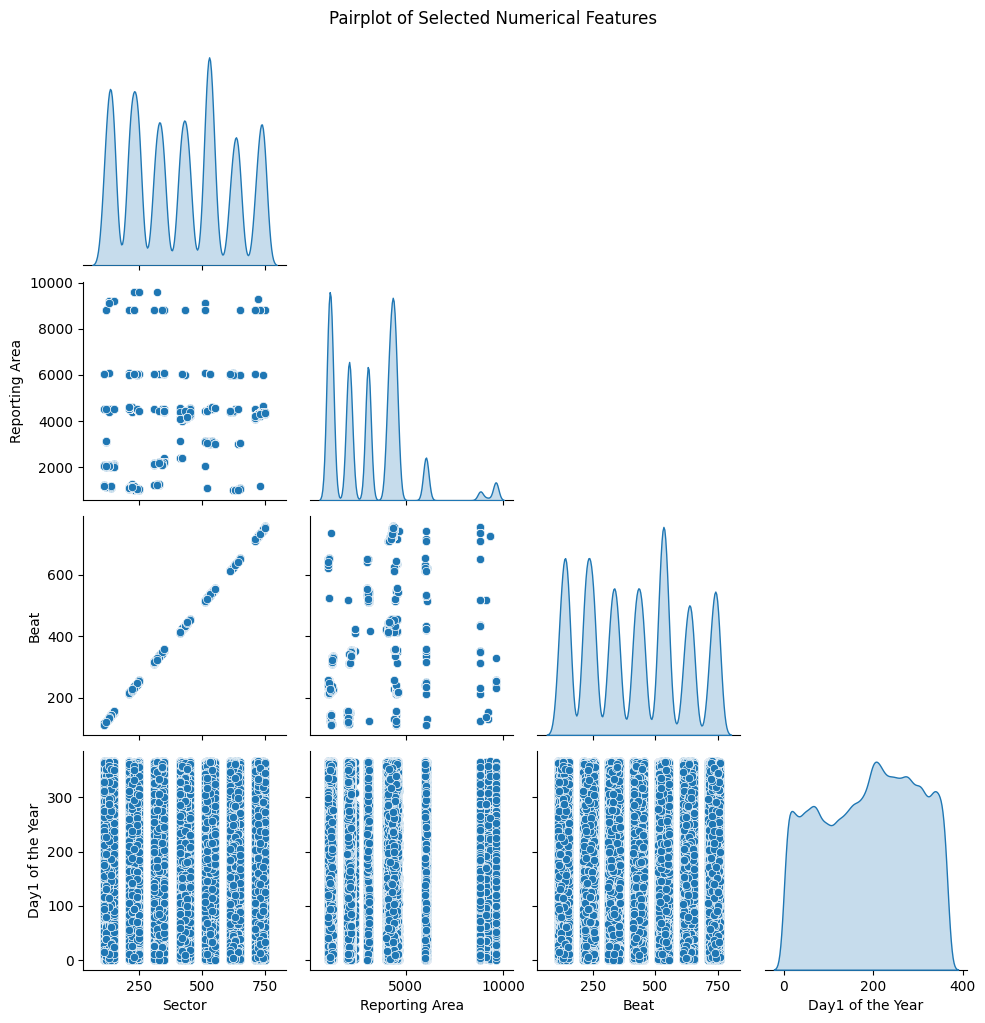

In [ ]:
#Pairplot
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of numerical columns for pairplot (e.g., ['Sector', 'Reporting Area', 'Council District', 'Beat'])
# Ensure to choose columns that are meaningful and have fewer missing values
num_cols = ['Sector', 'Reporting Area', 'Council District', 'Beat', 'Day1 of the Year']

# Drop rows with missing values in the selected columns
df_pairplot = df[num_cols].dropna()

# Plot pairplot
sns.pairplot(df_pairplot, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()


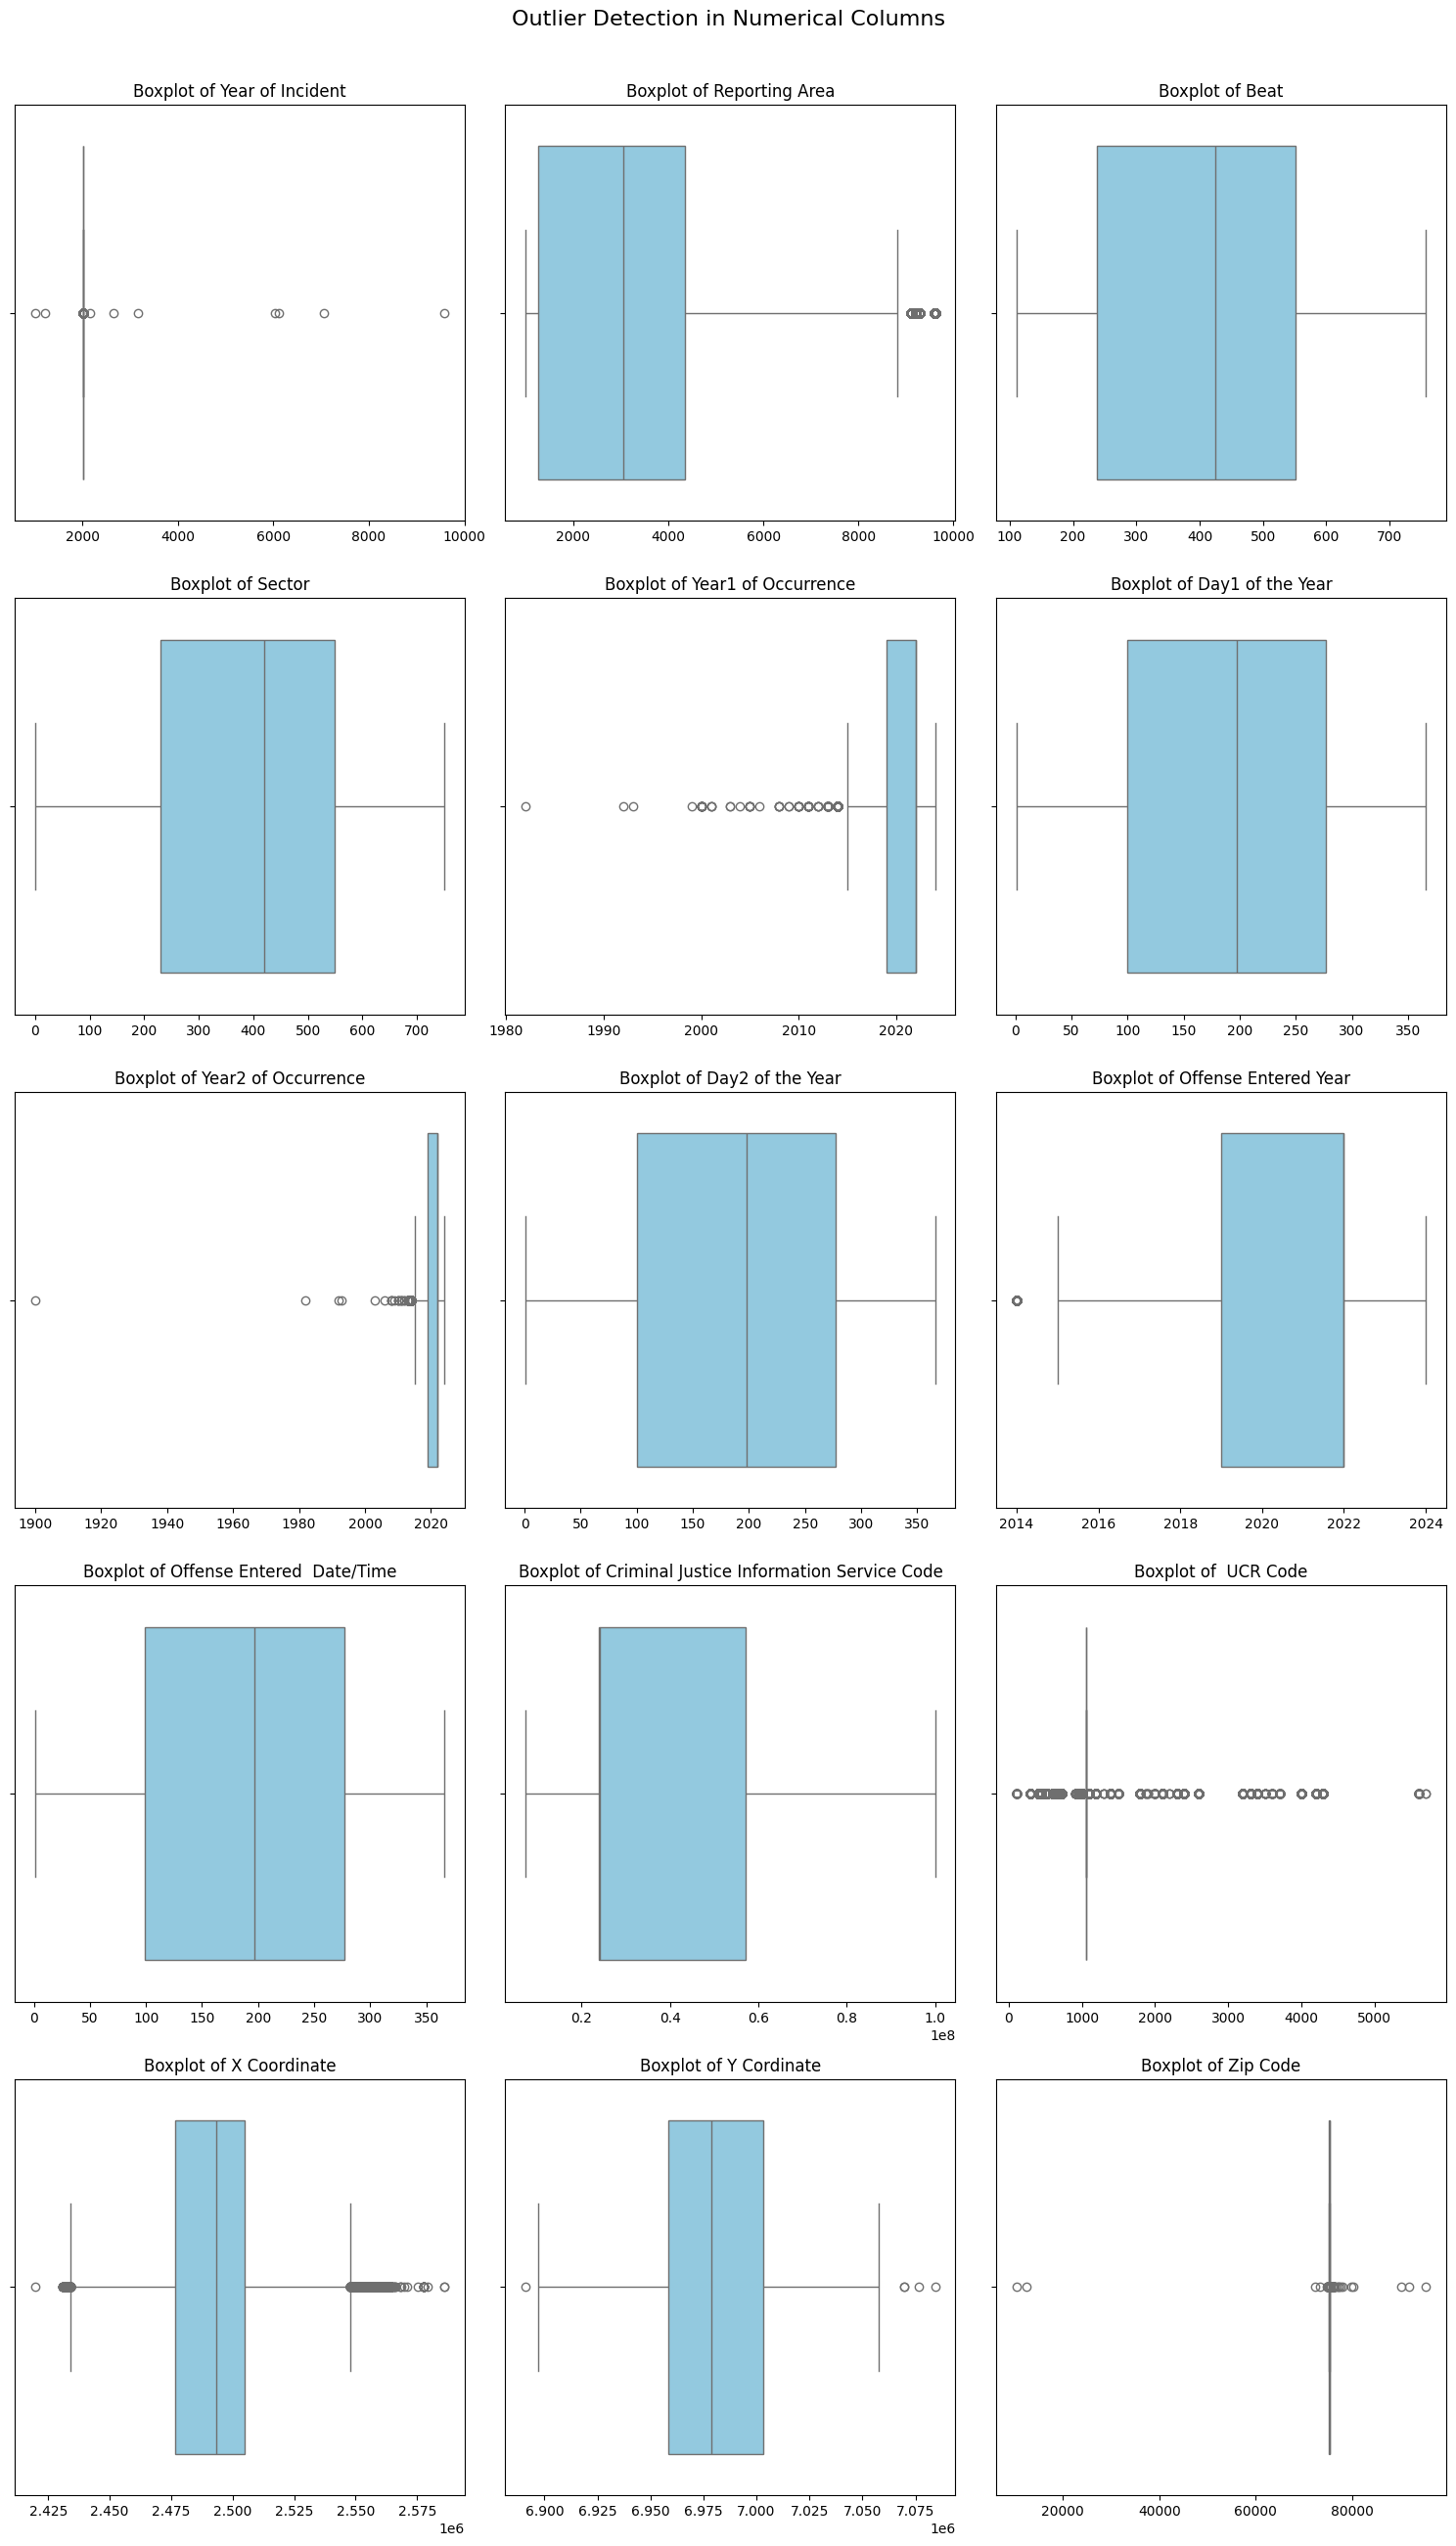

In [ ]:
# Boxplot

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for each numerical column to identify outliers
plt.figure(figsize=(15, 30))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel("")
plt.tight_layout()
plt.suptitle("Outlier Detection in Numerical Columns", y=1.02, fontsize=16)
plt.show()


In [ ]:
df.head()

,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,Reporting Area,Beat,Division,Sector,Council District,Target Area Action Grids,Community,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Special Report (Pre-RMS),Person Involvement Type,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Modus Operandi (MO),Family Offense,Hate Crime,Hate Crime Description,Weapon Used,Gang Related Offense,Drug Related Istevencident,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1,Case_Suspended
0,203058-2022,2022,203058-2022-01,1,PSE/09 - THEFT,THEFT OF PROP (AUTO ACC) <$100 - (NOT EMP),Apartment Parking Lot,Motor Vehicle,7152 FAIR OAKS AVE,NaN,4527.0,217.0,NORTHEAST,210.0,D13,Five Points,Vickery Meadows_PFA,00:00.0,2022,November,Tue,20:00,312,00:00.0,2022.0,November,Wed,7:00,313.0,03:00.0,52:49.0,2022,November,Wed,8:52,313,22-2198631,03:54.0,03:54.0,04:27.0,37:45.0,NaN,Victim,Individual,Hispanic or Latino,Hispanic or Latino,Female,94392,"WILLIS,LINDA,M",NaN,NaN,94392,T1245,54654,EX07,Investigations,Property Crime Division / NE Property Crimes,Suspended,Suspended,UNKN SUSP REMOVED THE REAR LICENSE PLATE OFF A...,False,NaN,NaN,NaN,NaN,No,MC-99999999-F133,99999999.0,PC 31.03(f),NaN,NaN,NaN,NaN,THEFT OF MOTOR VEHICLE PARTS OR ACCESSORIES,LARCENY/ THEFT OFFENSES,PROPERTY,23G,A,Coded,15:06.0,2503598.113,7005279.014,75231.0,DALLAS,TX,"7152 FAIR OAKS AVE\nDALLAS, TX 75231\n(32.8730...",1
1,264509-2016,2016,264509-2016-01,2,58 - ROUTINE INVESTIGATION,FALSE STATEMENT FOR PROPERTY/CREDIT $2500 < $30K,Single Family Residence - Occupied,NaN,8545 MIDPARK RD,NaN,1022.0,644.0,NORTH CENTRAL,640.0,D11,Coit Springvalley,KitMaham_PFA,00:00.0,2016,September,Fri,12:00,260,00:00.0,2016.0,November,Mon,12:00,312.0,00:00.0,20:19.0,2016,November,Fri,12:20,309,16-2199695,19:48.0,19:48.0,20:25.0,19:48.0,NaN,Victim,Individual,Hispanic or Latino,Hispanic or Latino,Male,8101,"CERVANTEZ,DAVID,RUBEN",NaN,NaN,8101,8101,111210,G169,Investigations,Special Investigations / Financial Crimes,Suspended,Suspended,UNKNOWN SUSPECT STOLE COMPS VEHICLE BY USING F...,False,NaN,NaN,Other,No,UNK,FS-26070139-K156,26070139.0,PC 32.32,FRAUD,FRAUD,1100.0,PART2,NaN,NaN,NaN,NaN,NaN,NaN,43:58.0,2503120.012,7028108.585,75240.0,DALLAS,TX,"8545 MIDPARK RD\nDALLAS, TX 75240\n(32.93652, ...",1
2,004110-2015,2015,004110-2015-01,2,58 - ROUTINE INVESTIGATION,CREDIT CARD OR DEBIT CARD ABUSE,Business Office,NaN,1400 S LAMAR ST,NaN,2123.0,151.0,CENTRAL,150.0,D2,NaN,NaN,00:00.0,2014,December,Mon,12:00,363,00:00.0,2014.0,December,Tue,12:00,364.0,00:00.0,21:06.0,2015,January,Tue,9:21,6,15-0034199,20:18.0,20:18.0,21:14.0,20:18.0,NaN,Victim,Business,NaN,NaN,NaN,7110,"VILLARREAL,EDWARD",NaN,NaN,7110,7110,83070,D197,Investigations,Special Investigations / Financial Crimes,Suspended,Suspended,SUSPECT GAVE FALSE CREDIT CARD INFORMATION TO ...,False,NaN,NaN,None (Mutually Exclusive),No,No,FS-26050014-K74,26050014.0,PC 32.31,FRAUD,FRAUD,1100.0,PART2,NaN,NaN,NaN,Na

##Question 1. Research Question: How do demographic characteristics of victims influence the likelihood of case suspension?


Analysis Technique: Logistic Regression and Stepwise Logistic Regression


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd



# Preprocessing: Create `Case_Suspended` and select predictors
df['Case_Suspended'] = df['UCR Disposition'].apply(lambda x: 1 if 'Suspended' in str(x) else 0)
df = df.dropna(subset=['Case_Suspended', 'Type of Incident', 'Victim Race', 'Location1'])

# Define predictors and target
X = df[['Type of Incident', 'Victim Race', 'Victim Ethnicity', 'Location1', 'Reporting Area']]
y = df['Case_Suspended']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)
print("\nTop Factors Contributing to Suspension:")
print(importance_df.head(10))


Confusion Matrix:
[[  61  149]
 [  10 1857]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.29      0.43       210
           1       0.93      0.99      0.96      1867

    accuracy                           0.92      2077
   macro avg       0.89      0.64      0.70      2077
weighted avg       0.92      0.92      0.91      2077


Top Factors Contributing to Suspension:
                                               Feature  Importance
102        Type of Incident_NATURAL DEATH (NO OFFENSE)    0.065980
0                                       Reporting Area    0.052142
3       Type of Incident_ACCIDENTAL DEATH (NO OFFENSE)    0.014430
201    Type of Incident_UNEXPLAINED DEATH (NO OFFENSE)    0.009632
101                            Type of Incident_MURDER    0.008725
17             Type of Incident_ASSAULT -VERBAL THREAT    0.008272
192  Type of Incident_TRAFFIC FATALITY- NOT DWI- UN...    0.007426
210                        

## Question 2. Research Question: Are there patterns over time (seasonal or yearly) in the suspension rates of investigations?


Analysis Technique: Time Series Analysis


<ipython-input-20-a3f025baa230>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Case_Suspended'] = df['UCR Disposition'].apply(lambda x: 1 if 'Suspended' in str(x) else 0)
<ipython-input-20-a3f025baa230>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year of Incident']
<ipython-input-20-a3f025baa230>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

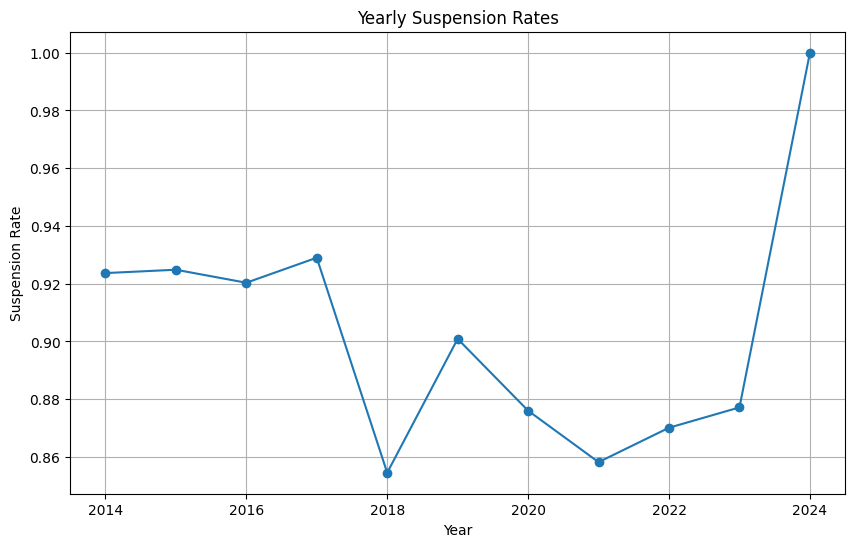

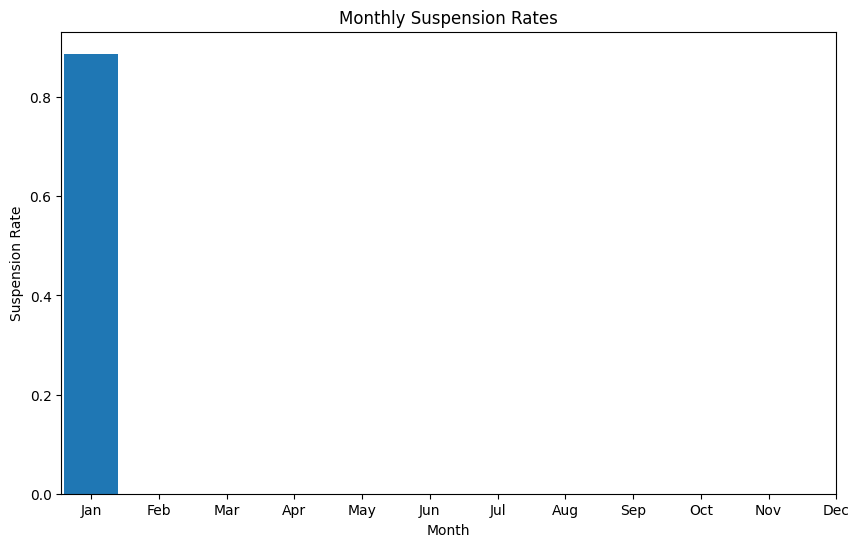

Insufficient data for seasonal decomposition. At least 730 observations are required, but only 24 are available.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



# Step 2: Create `Case_Suspended` variable
df['Case_Suspended'] = df['UCR Disposition'].apply(lambda x: 1 if 'Suspended' in str(x) else 0)

# Step 3: Prepare time-based features
df['Year'] = df['Year of Incident']
df['Month'] = pd.to_datetime(df['Year of Incident'].astype(str) + '-01-01').dt.month
df['Date'] = pd.to_datetime(df['Date of Report'])

# Step 4: Aggregate suspension rates by year
yearly_data = df.groupby('Year')['Case_Suspended'].mean().reset_index()

# Step 5: Plot yearly trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['Case_Suspended'], marker='o')
plt.title('Yearly Suspension Rates')
plt.xlabel('Year')
plt.ylabel('Suspension Rate')
plt.grid(True)
plt.show()

# Step 6: Aggregate suspension rates by month
monthly_data = df.groupby('Month')['Case_Suspended'].mean().reset_index()

# Step 7: Plot monthly trends
plt.figure(figsize=(10, 6))
plt.bar(monthly_data['Month'], monthly_data['Case_Suspended'])
plt.title('Monthly Suspension Rates')
plt.xlabel('Month')
plt.ylabel('Suspension Rate')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Step 8: Time Series Decomposition (optional)
# Ensure data is sorted by date and aggregated daily
daily_data = df.groupby('Date')['Case_Suspended'].mean().reset_index()
daily_data.set_index('Date', inplace=True)


# Check if there are enough data points for seasonal decomposition
if len(daily_data) >= 730:  # Check if there are at least 730 observations
    # Perform decomposition if enough data
    result = seasonal_decompose(daily_data['Case_Suspended'], model='additive', period=365)
    # Plot decomposition
    result.plot()
    plt.show()
else:
    print("Insufficient data for seasonal decomposition. "
          "At least 730 observations are required, but only {} are available.".format(len(daily_data)))

## Question 3. Research Question: Which types of incidents have the highest probability of being suspended, and how does incident location affect this?
Analysis Technique: Classification with Decision Tree


Confusion Matrix:
[[  53  157]
 [   7 1860]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.25      0.39       210
           1       0.92      1.00      0.96      1867

    accuracy                           0.92      2077
   macro avg       0.90      0.62      0.68      2077
weighted avg       0.92      0.92      0.90      2077



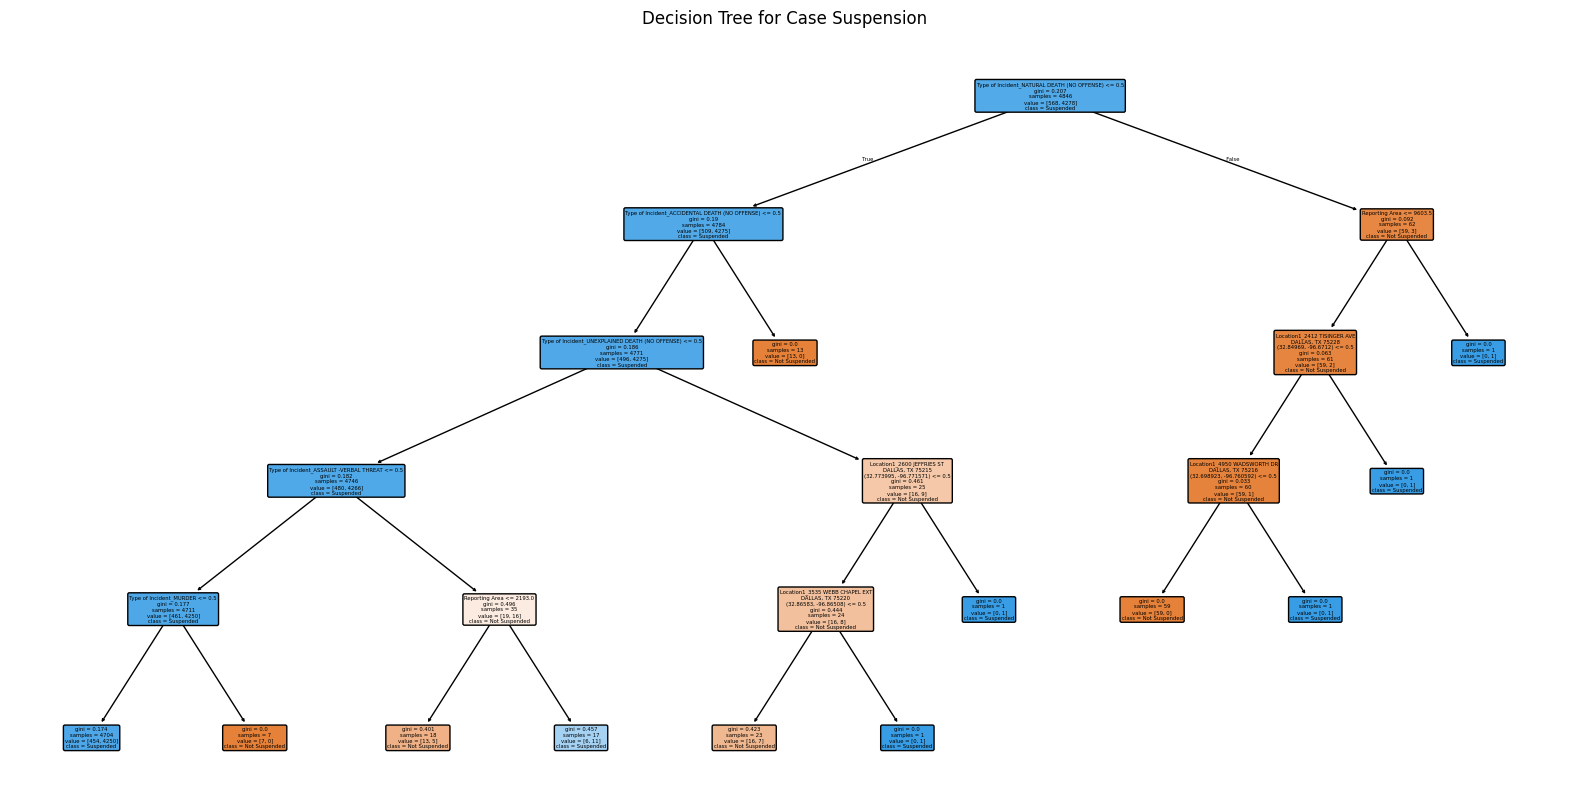


Feature Importances:
                                                Feature  Importance
102         Type of Incident_NATURAL DEATH (NO OFFENSE)    0.554338
3        Type of Incident_ACCIDENTAL DEATH (NO OFFENSE)    0.131964
201     Type of Incident_UNEXPLAINED DEATH (NO OFFENSE)    0.091549
17              Type of Incident_ASSAULT -VERBAL THREAT    0.087220
101                             Type of Incident_MURDER    0.072333
...                                                 ...         ...
1875  Location1_2410 TAYLOR ST\nDALLAS, TX 75201\n(3...    0.000000
1874  Location1_2410 TAYLOR ST\nDALLAS, TX 75201\n(3...    0.000000
1873  Location1_2410 LANARK AVE\nDALLAS, TX 75203\n(...    0.000000
1872  Location1_2410 IROQUOIS DR\nDALLAS, TX 75212\n...    0.000000
1883  Location1_2415 COSTA MESA DR\nDALLAS, TX 75228...    0.000000

[5628 rows x 2 columns]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Step 2: Create `Case_Suspended` variable
df['Case_Suspended'] = df['UCR Disposition'].apply(lambda x: 1 if 'Suspended' in str(x) else 0)

# Step 3: Select relevant features
df = df.dropna(subset=['Type of Incident', 'Location1', 'Reporting Area'])
X = df[['Type of Incident', 'Location1', 'Reporting Area']]
y = df['Case_Suspended']

# Step 4: Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = dt_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Suspended', 'Suspended'], filled=True, rounded=True)
plt.title('Decision Tree for Case Suspension')
plt.show()

# Step 9: Feature Importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance)


Question 4: Which types of incidents have the highest probability of being suspended, and how does incident location affect this?




Top Incident Types by Suspension Rate:
Type of Incident
ASSAULT (AGG) -(SBI) - TRAFFIC - RECKLESS DRIVING                   1.0
UNAUTHORIZED REPRODUCTION OF TEXAS TEMP TAG                         1.0
ACCIDENT INVOLVING INJURY                                           1.0
UNAUTHORIZED USE OF MOTOR VEH - (ATT) OTHER VEH                     1.0
UNAUTHORIZED USE OF MOTOR VEH - (ATT) TRUCK OR BUS                  1.0
ASSAULT (AGG) -SERIOUS BODILY INJURY                                1.0
SUSPICIOUS PERSON MIR (MISCELLANEOUS INCIDENT REPORT NO OFFENSE)    1.0
PUBLISH/THREAT TO PUBLISH INTIMATE VISUAL MATERIAL                  1.0
RECOVERED OUT OF TOWN STOLEN PROPERTY (NO OFFENSE)                  1.0
ROBBERY (AGG) OF INDIVIDUAL, PRELIMINARY INVESTIGATION              1.0
Name: Case_Suspended, dtype: float64

Top Locations by Suspension Rate:
Reporting Area
9102.0    1.0
9104.0    1.0
9105.0    1.0
9201.0    1.0
9202.0    1.0
9203.0    1.0
1020.0    1.0
8816.0    1.0
4014.0    1.0
4015.0    

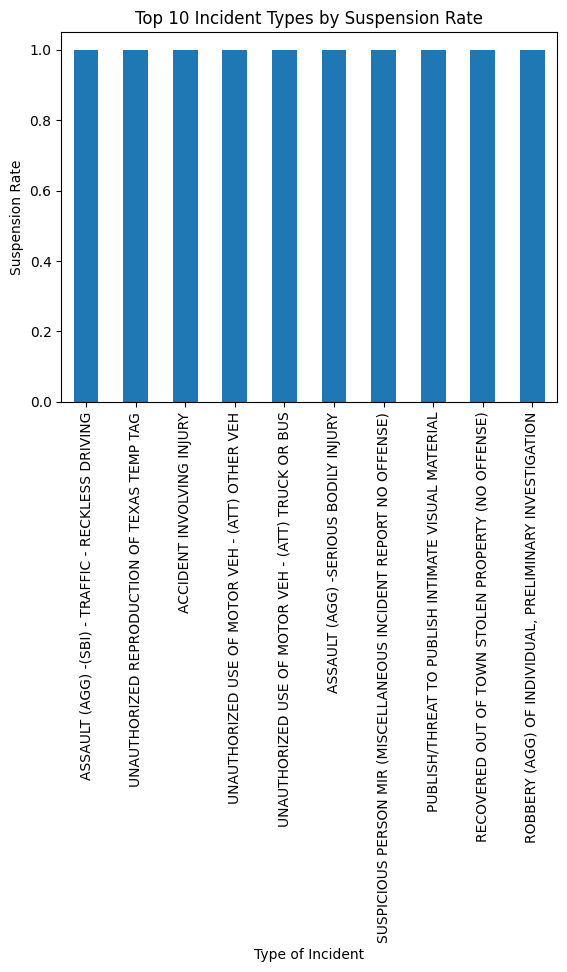

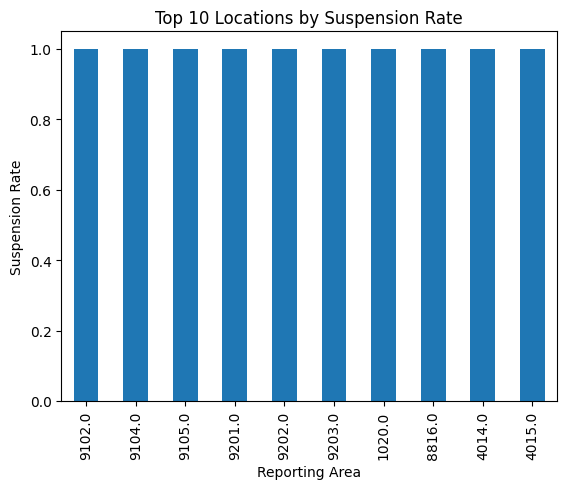

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create Case_Suspended column
df['Case_Suspended'] = df['UCR Disposition'].apply(lambda x: 1 if 'Suspended' in str(x) else 0)

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Type of Incident', 'Reporting Area'])

# Calculate suspension rates by incident type
incident_rates = df.groupby('Type of Incident')['Case_Suspended'].mean().sort_values(ascending=False)
print("\nTop Incident Types by Suspension Rate:")
print(incident_rates.head(10))

# Calculate suspension rates by reporting area
location_rates = df.groupby('Reporting Area')['Case_Suspended'].mean().sort_values(ascending=False)
print("\nTop Locations by Suspension Rate:")
print(location_rates.head(10))

# Plot top 10 incident types
incident_rates.head(10).plot(kind='bar', title='Top 10 Incident Types by Suspension Rate')
plt.ylabel('Suspension Rate')
plt.show()

# Plot top 10 locations
location_rates.head(10).plot(kind='bar', title='Top 10 Locations by Suspension Rate')
plt.ylabel('Suspension Rate')
plt.show()


Question 5: What are the primary factors that predict the duration until an investigation is suspended?



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate Suspension Duration
df['Date_of_Incident'] = pd.to_datetime(df['Date1 of Occurrence'])
df['Date_of_Report'] = pd.to_datetime(df['Date of Report'])
df['Suspension_Duration'] = (df['Date_of_Report'] - df['Date_of_Incident']).dt.days

# Drop invalid rows
df = df.dropna(subset=['Suspension_Duration', 'Type of Incident', 'Reporting Area'])
df = df[df['Suspension_Duration'] >= 0]

# Top factors by average suspension duration
print("\nAverage Suspension Duration by Type of Incident:")
print(df.groupby('Type of Incident')['Suspension_Duration'].mean().sort_values(ascending=False).head())

print("\nAverage Suspension Duration by Reporting Area:")
print(df.groupby('Reporting Area')['Suspension_Duration'].mean().sort_values(ascending=False).head())





Average Suspension Duration by Type of Incident:
Type of Incident
VOIDED OFFENSE                                        0.0
UNAUTHORIZED REPRODUCTION OF TEXAS TEMP TAG           0.0
UNAUTHORIZED USE OF MOTOR VEH - (ATT) AUTOMOBILE      0.0
UNAUTHORIZED USE OF MOTOR VEH - (ATT) OTHER VEH       0.0
UNAUTHORIZED USE OF MOTOR VEH - (ATT) TRUCK OR BUS    0.0
Name: Suspension_Duration, dtype: float64

Average Suspension Duration by Reporting Area:
Reporting Area
9610.0    0.0
1001.0    0.0
1002.0    0.0
1003.0    0.0
1004.0    0.0
Name: Suspension_Duration, dtype: float64


<ipython-input-43-4aff46ce8133>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_of_Report'] = pd.to_datetime(df['Date of Report'])
